# Performing principle component analysis

Let's now have a closer look at PCA. First, import some packages:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
from random import randint

# The dataset

Then, load the breast cancer dataset and normalize it for use with PCA:

In [2]:
data = datasets.load_breast_cancer()

X = data.data
y = data.target
#If there is any variance in your data due to magnitude issues, PCA will ignore many of the other relevant values. Therefore, it is best to first normalise the data.
X = normalize(X)

covariance matrix __tr(X)*X__ for dataset __X__ given that the dataset is normalized with mean 0 and variance 1.

# Applying PCA

Apply PCA:

In [4]:
pca = PCA()
pca.fit(X)

# The new variable contains the transformed data, i.e., it will have as many columns as PCs generated.
# All observations are reconstructed by weighing the values for their variables according to the correlation of that
# variable with the PC
X_2 = pca.transform(X)

# Visualisation

Create the scree plot:

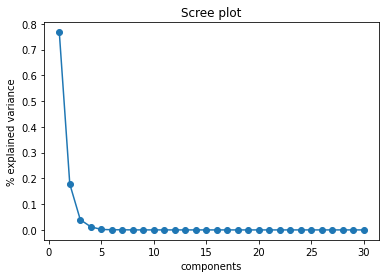

In [6]:
plt.plot(range(1,len(pca.components_)+1),pca.explained_variance_ratio_,'-o')
plt.xlabel('components')
plt.ylabel('% explained variance')
plt.title('Scree plot')
plt.show()

Let's do PCA with a limited number of components:

In [7]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [8]:
X_2 = pca.transform(X)

Then plot the PCs against each other:

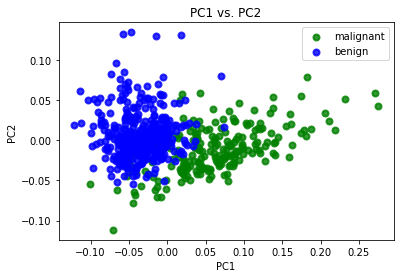

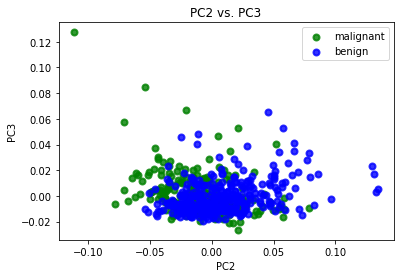

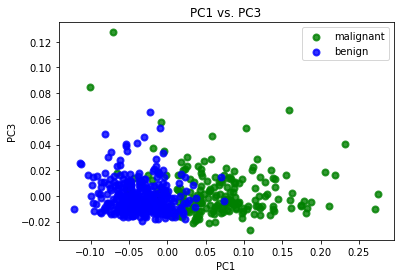

In [19]:
# Some variables for plotting:
colors = ['green','blue']
lw = 2

# Plot 1
for color, i, target_name in zip(colors, [0,1],data.target_names):
    plt.scatter(X_2[y==i,0], X_2[y==i, 1], color = color, alpha=.8, lw=lw, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PC1 vs. PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Plot 2
for color, i, target_name in zip(colors, [0,1],data.target_names):
    plt.scatter(X_2[y==i,1], X_2[y==i, 2], color = color, alpha=.8, lw=lw, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PC2 vs. PC3')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

# Plot 2
for color, i, target_name in zip(colors, [0,1],data.target_names):
    plt.scatter(X_2[y==i,0], X_2[y==i, 2], color = color, alpha=.8, lw=lw, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PC1 vs. PC3')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

# Plotting loadings

Finally, plot the variables' loadings(component weights scaled according to the variance explained by the PC):

Loadings=Eigenvectors⋅sqrt(Eigenvalues)

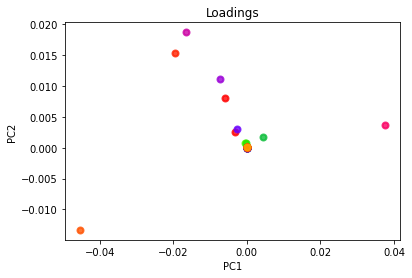

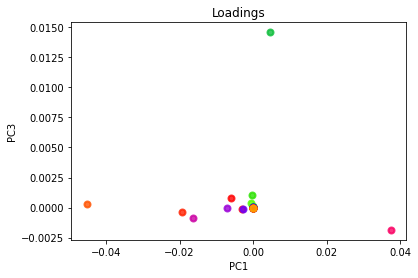

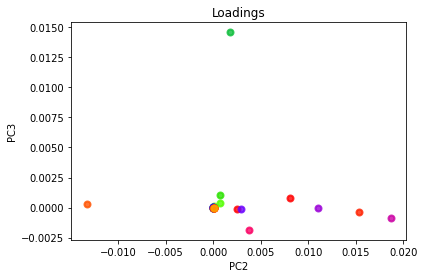

In [24]:
# Notice how I use a color map to make sure the variables are colored differently, but consequently over the 3 graphs

for i in range(0,len(pca.components_[0])):
    pca_0_loadings = pca.components_[0,i] * np.sqrt(pca.explained_variance_[0])
    pca_1_loadings = pca.components_[1,i] * np.sqrt(pca.explained_variance_[1])
    plt.scatter(pca_0_loadings, pca_1_loadings,color=cm.prism(i), alpha=.8, lw=lw)
plt.title('Loadings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

for i in range(0,len(pca.components_[0])):
    pca_0_loadings = pca.components_[0,i] * np.sqrt(pca.explained_variance_[0])
    pca_2_loadings = pca.components_[2,i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_0_loadings, pca_2_loadings, color=cm.prism(i), alpha=.8, lw=lw)
plt.title('Loadings')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

for i in range(0,len(pca.components_[0])):
    pca_1_loadings = pca.components_[1,i] * np.sqrt(pca.explained_variance_[1])
    pca_2_loadings = pca.components_[2,i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_1_loadings, pca_2_loadings, color=cm.prism(i), alpha=.8, lw=lw)
plt.title('Loadings')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

Notice how, e.g, the dark green variable seems to be dominating the third component and does not interact with the others(close to 0 for both PC1 and PC2). Other, like the orange variable on the left seems to have an effect on both PC1 and PC2, but not on PC3. This way, we can learn more about the variables' effect on the PCs, and hence the overall explained variance.